## Lab | Random Forests

For this lab, you will be using the CSV files provided in the files_for_lab folder.

Instructions:

**Apply the Random Forest algorithm to predict the TARGET_B.** 
- Please note that this column suffers from **class imbalance**. 
- Fix the class imbalance using **upsampling**.

**Discuss the model predictions and it's impact in the bussiness scenario.** 
- Is the cost of a **false positive equals to the cost of the false negative**? 
- How much the money the company will not earn because of missclassifications made by the model?

**Sklearn classification models are trained to maximize the accuracy.** 
- However, another error metric will be more relevant here. Which one? 
- Please checkout make_scorer alongside with GridSearchCV in order to **train the model 
to maximize the error metric** of interest in this case.

* TARGET_B Target Variable: Binary Indicator for Response to 97NK Mailing
* TARGET_D Target Variable: Donation Amount (in \$) associated with the Response to 97NK Mailing

In [1]:
# Load libraries

import pandas as pd
import numpy as np

In [2]:
# Reading data
categorical = pd.read_csv('../../Afternoon/lab-random-forests/files_for_lab/categorical.csv')
numerical = pd.read_csv('../../Afternoon/lab-random-forests/files_for_lab/numerical.csv')
targets = pd.read_csv('../../Afternoon/lab-random-forests/files_for_lab/target.csv')

In [3]:
# Do I need columns from numerical? #AVGGIFT?
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [4]:
targets

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [5]:
targets.isna().sum()

TARGET_B    0
TARGET_D    0
dtype: int64

In [ ]:
# Detect class imbalance

In [6]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Is dropping other column Target_D necessary?

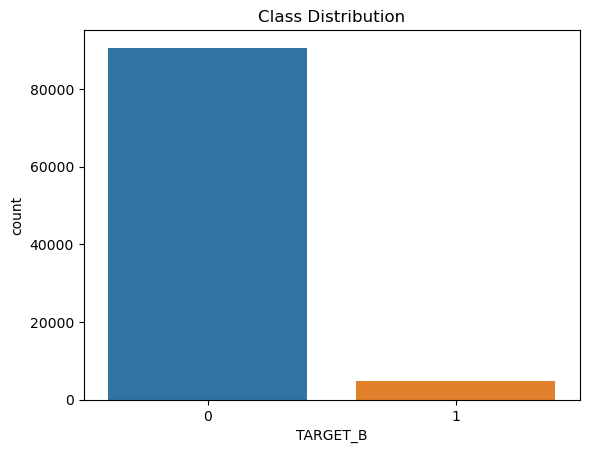

In [7]:
# Check 'TARGET_B' for class imbalance

df = pd.DataFrame(targets)

sns.countplot(data=df, x='TARGET_B')
plt.title('Class Distribution')
plt.show()

In [8]:
df['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [9]:
df.value_counts()

TARGET_B  TARGET_D
0         0.00        90569
1         10.00         941
          15.00         591
          20.00         577
          5.00          503
                      ...  
          44.21           1
          16.87           1
          17.50           1
          18.25           1
          4.50            1
Length: 71, dtype: int64

<Axes: ylabel='count'>

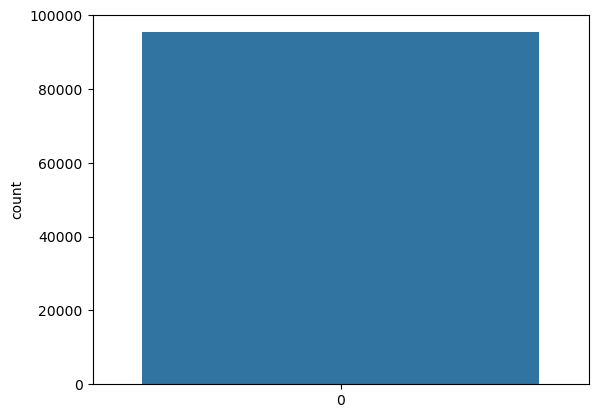

In [10]:
import seaborn as sns
sns.countplot(df['TARGET_B'])

In [ ]:
#Identify the Imbalanced Dataset:

The dataset is imbalanced: the distribution of classes is significantly skewed.

In [11]:
# Import Necessary Libraries:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


In [12]:
#create two different dataframe of majority and minority class 
df_majority = df[(df['TARGET_B']==0)] 
df_minority = df[(df['TARGET_B']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 90569, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [13]:
df_upsampled['TARGET_B'].value_counts()

1    90569
0    90569
Name: TARGET_B, dtype: int64

<Axes: ylabel='count'>

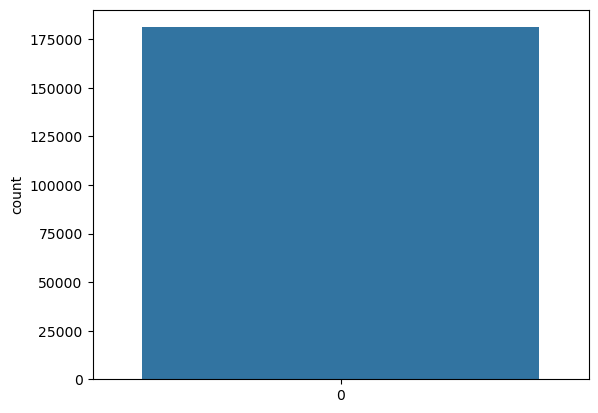

In [14]:
import seaborn as sns
sns.countplot(df_upsampled['TARGET_B'])

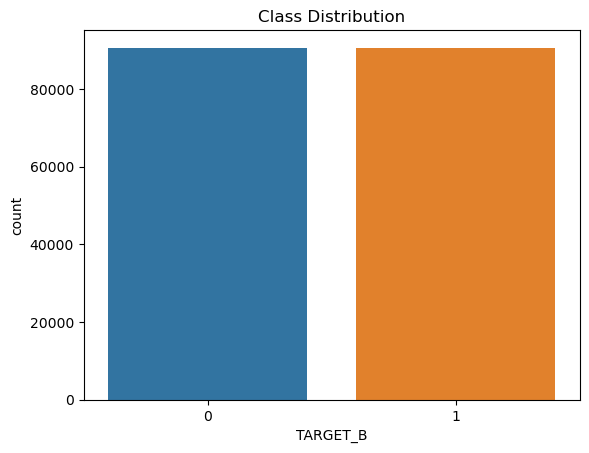

In [15]:
df = pd.DataFrame(targets)

sns.countplot(data=df_upsampled, x='TARGET_B')
plt.title('Class Distribution')
plt.show()

In [16]:
#targets
df_upsampled

,TARGET_B,TARGET_D
17204,1,10.0
73688,1,8.0
60925,1,20.0
9193,1,10.0
86815,1,25.0
...,...,...
95406,0,0.0
95407,0,0.0
95408,0,0.0
95409,0,0.0


In [17]:
targets.isna().sum()

TARGET_B    0
TARGET_D    0
dtype: int64

In [18]:
df_upsampled['TARGET_B'].value_counts()

1    90569
0    90569
Name: TARGET_B, dtype: int64

In [ ]:
#Apply upsampling:

In [19]:
# Save df_upsampled
df_upsampled.to_csv('df_upsampled.csv', index=False)
# Use balanced dataset for training machine learning model:
df_upsampled

,TARGET_B,TARGET_D
17204,1,10.0
73688,1,8.0
60925,1,20.0
9193,1,10.0
86815,1,25.0
...,...,...
95406,0,0.0
95407,0,0.0
95408,0,0.0
95409,0,0.0


In [ ]:
# Apply the Random Forest algorithm to predict the TARGET_B:

In [20]:
# Import Libraries
from sklearn.ensemble import RandomForestRegressor  # For regression

In [21]:
# Load and Preprocess Data:

# Load your dataset into a DataFrame (replace 'your_data.csv' with your dataset)
targets = pd.read_csv('../../Afternoon/lab-random-forests/df_upsampled.csv')

# Define features (X) and the target (y)
X = df.drop('TARGET_B', axis=1)  # Features (all columns except the target column)
y = df['TARGET_B']  # Target column you want to predict

In [22]:
# Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Create and Train the Random Forest Model
# Create a Random Forest model

model = RandomForestRegressor()  # For regression

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor()

In [24]:
# Make Predictions
y_pred = model.predict(X_test)  # Make predictions on the test data
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
# Create a prediction DataFrame
prediction_df = pd.DataFrame({'TARGTET_B': y_pred})
# Save the prediction file
prediction_df.to_csv('prediction.csv', index=False)
prediction_df

,TARGTET_B
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
19078,0.0
19079,0.0
19080,0.0
19081,0.0


In [ ]:
# Assuming 'target_column' is the name of your target column
X_train = train_data.drop(columns=['Class'])
y_train = train_data['Class']
# Extract the feature columns for the test data
X_test = test_data.drop(columns=['Class'])  # Replace with appropriate feature columns
# Initialize and train the model
lg = LogisticRegression()
lg.fit(X_train, y_train)
# Make predictions on the test data
y_pred = lg.predict(X_test)
# Create a submission DataFrame
submission_df = pd.DataFrame({'Class': y_pred})
# Save the submission file
submission_df.to_csv('submission.csv', index=False)

In [ ]:
# Evaluate Model Performance # Classification
#from sklearn.metrics import accuracy_score, classification_report

#accuracy = accuracy_score(y_test, y_pred)
#report = classification_report(y_test, y_pred)

#print(f"Accuracy: {accuracy}")
#print("Classification Report:\n", report)


For **regression** tasks, metrics like Mean Absolute Error (MAE) 
and Mean Squared Error (MSE) are commonly used.

In [ ]:
# Define y_true for a regression problem:
# Assuming 'TARGET_B' is the column you want to predict

y_true = df['TARGET_B']
y_true

In [27]:
# Define y_true for a regression problem:
# Assuming 'TARGET_B' is the column you want to predict

y_true = df_upsampled['TARGET_B']
y_true

17204    1
73688    1
60925    1
9193     1
86815    1
        ..
95406    0
95407    0
95408    0
95409    0
95411    0
Name: TARGET_B, Length: 181138, dtype: int64

After you've defined **y_true**, you can use it to evaluate your model's performance by comparing its predictions to these true values. 

In practice, **y_true** is the **ground truth** data that you should have during the model evaluation phase to assess how well your model is performing.

It allows you to determine the model's accuracy in predicting the target variable.

In [ ]:
# Discuss the model predictions and it's impact in the bussiness scenario:
# Is the cost of a false positive equals to the cost of the false negative? Confusion Matrix?
# How much the money the company will not earn because of missclassifications made by the model?

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

So, if the classifier predicts the minority class but the prediction is erroneous and false-positive increases, the precision metric will be low and so as F1 score.

Also, if the classifier identifies the minority class poorly, i.e. more of this class wrongfully predicted as the majority class then false negatives will increase, so recall and F1 score will low. F1 score only increases if both the number and quality of prediction improves.

* **Discuss the model predictions and it's impact in the bussiness scenario:**
* Is the cost of a false positive is greater than the cost of a false negative? 
If the company expect a donation amount but it is not made they cannot spend that donation amount, but no money was lost.
If the company gets suprised by a donation amount, no money was lost but they can spend it now.

* **How much the money the company will not earn because of missclassifications made by the model?**
With false positives the company will not earn.
* How much money will they not earn with false positives?

In [ ]:
# Choose relevant error metric:

In [29]:
# Evaluate Model Performance # Regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_absolute_error = mean_absolute_error(y_true, y_pred)
mean_squared_error = mean_squared_error(y_true, y_pred)

print(f"Mean Absolute Error: {mean_absolute_error}")

ValueError: Found input variables with inconsistent numbers of samples: [181138, 19083]

In [ ]:
# Train the model to maximize the error metric:

__________________________________

## Questions

* How to handle TARGET_D and TARGET_B and "targets"? 
* Do they need to be concatenated?
* What kind of datacleaning needs to be done? Did I do enough?
* How to Separate the Classes for upsampeling? X
* What kind of upsampling needs to be done? X
* How kan I apply upsampling correctly? 
* How to discuss bussiness scenario?
* How to compare cost false positive, false negative?
* How to see how much money company will not make by missclassification model